# Linear Regression on Startup Funding

This notebook trains a linear regression model to predict `amount_usd` using one-hot encoded features.

**What happens here**
- Load the modeling-ready dataset created from the cleaned CSV.
- Split into train and test sets.
- Train a linear regression model.
- Evaluate performance with $R^2$ and RMSE.
- Visualize predictions and residuals using matplotlib.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data_path = r"d:\\jjjjjj\\Intership_Calls\\Data_Processing\\startup_funding_regression_ready.csv"
df = pd.read_csv(data_path)
df.shape

(2225, 5709)

In [14]:
# Split features and target
X = df.drop(columns=["amount_usd"])
y = df["amount_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Train model
model = LinearRegression(n_jobs=None)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
rmse, r2

(111616868.8762373, -0.8008391654616371)

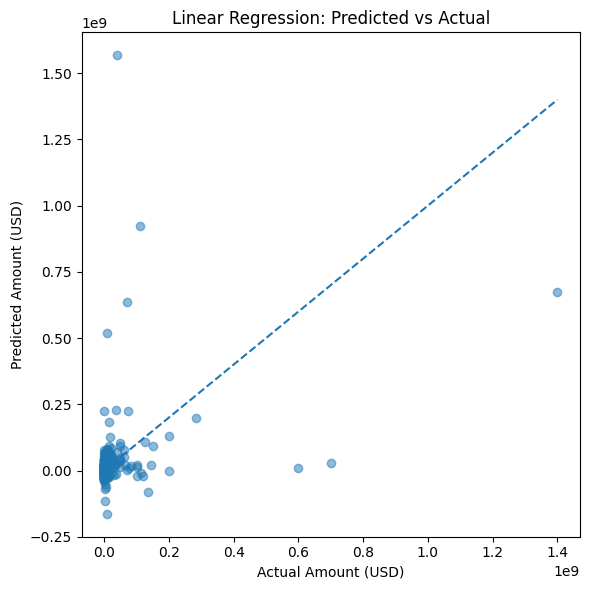

In [17]:
# Predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Amount (USD)")
plt.ylabel("Predicted Amount (USD)")
plt.title("Linear Regression: Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.tight_layout()
plt.show()

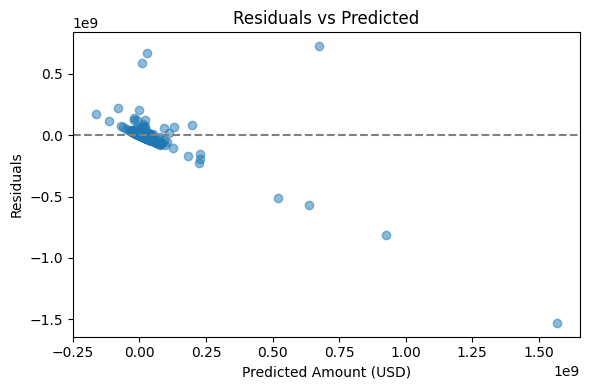

In [18]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Predicted Amount (USD)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()